In [24]:
install.packages("ROCR")

Installing package into 'C:/Users/AKSHAY/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\AKSHAY\AppData\Local\Temp\RtmpeIkMYB\downloaded_packages


In [1]:
setwd("D:/BABI/BABI-17th Residency/WSMA/Assignment/Assignment_work")
getwd()

[1] "D:/BABI/BABI-17th Residency/WSMA/Assignment/Assignment_work"

In [3]:
data <- read.csv("Dataset.csv")

In [4]:
#loading text mining packages

library(tm) 
library(SnowballC)
library(wordcloud)

Warning message:
"package 'tm' was built under R version 3.6.3"Loading required package: NLP
Warning message:
"package 'SnowballC' was built under R version 3.6.3"Warning message:
"package 'wordcloud' was built under R version 3.6.3"Loading required package: RColorBrewer


In [5]:
#loading the ML packages

library(mlr)
library(dplyr)
library(explore)

Warning message:
"package 'mlr' was built under R version 3.6.3"Loading required package: ParamHelpers
Warning message:
"package 'ParamHelpers' was built under R version 3.6.3"'mlr' is in maintenance mode since July 2019. Future development
efforts will go into its successor 'mlr3' (<https://mlr3.mlr-org.com>).
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'explore' was built under R version 3.6.3"

In [6]:
#loading the data split packages

library(caTools)
library(caret)

Warning message:
"package 'caTools' was built under R version 3.6.2"Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Attaching package: 'ggplot2'

The following object is masked from 'package:NLP':

    annotate


Attaching package: 'caret'

The following object is masked from 'package:mlr':

    train



In [7]:
#text mining

corpusstc <- Corpus(VectorSource(data$description)) #converting the column description into unigrams

corpusstc <- tm_map(corpusstc, tolower) #converting the unigrams in description column into lower case
corpusstc <- tm_map(corpusstc, removePunctuation) #remove the punctuation marks
corpusstc <- tm_map(corpusstc, removeWords, c(stopwords("english"))) #removing the stop words
corpusstc <- tm_map(corpusstc, stemDocument) #stemming the document

Warning message in tm_map.SimpleCorpus(corpusstc, tolower):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpusstc, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpusstc, removeWords, c(stopwords("english"))):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpusstc, stemDocument):
"transformation drops documents"

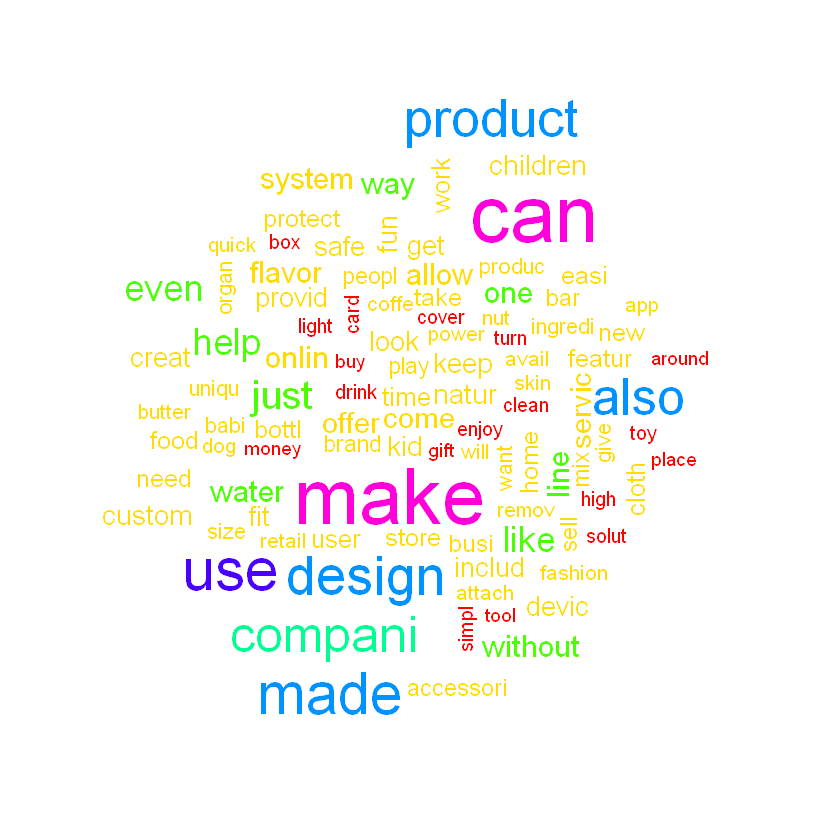

In [8]:
#forming a word cloud based on the number of occurences of the words

wordcloud(corpusstc, colors = rainbow(7), max.words = 100)

In [9]:
#Sentiment Analysis

library(sentimentr)
library(syuzhet)

Warning message:
"package 'sentimentr' was built under R version 3.6.3"Warning message:
"package 'syuzhet' was built under R version 3.6.3"
Attaching package: 'syuzhet'

The following object is masked from 'package:sentimentr':

    get_sentences



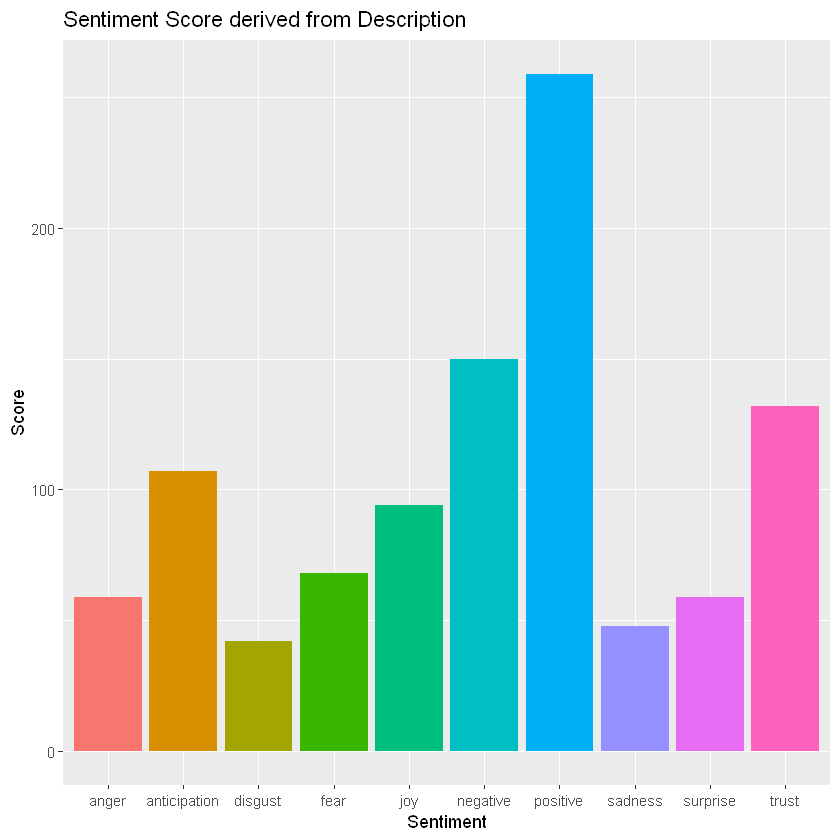

In [10]:
STsentiment = get_nrc_sentiment(as.character(corpusstc))
Score = data.frame(colSums(STsentiment[,]))
names(Score) = "Score"
Score = cbind("sentiment" = rownames(Score), Score)
rownames(Score) = NULL
ggplot(data = Score, aes(x = sentiment, y = Score))+
  geom_bar(aes(fill=sentiment), stat = "identity") +
  theme(legend.position = "none") +
  xlab("Sentiment") + ylab("Score") + ggtitle("Sentiment Score derived from Description")

In [12]:
#Forming the DTM

frequenciesstc <- DocumentTermMatrix(corpusstc) 

sparsestc <- removeSparseTerms(frequenciesstc, 0.995) #removing the least occurring words
stcsparse <- as.data.frame(as.matrix(sparsestc)) #forming the DTM

colnames(stcsparse) <- make.names(colnames(stcsparse))

In [13]:
#copying the existing columns in the dataset to the newly formed DTM

stcsparse$deal <- data$deal
stcsparse$askedFor <- data$askedFor
stcsparse$exchangeForStake <- data$exchangeForStake
stcsparse$valuation <- data$valuation

str(stcsparse$deal)
stcsparse$deal <- as.factor(stcsparse$deal) #converting the dependent variable into categorical variable

summary(stcsparse$deal)

 logi [1:495] FALSE TRUE TRUE FALSE FALSE TRUE ...


FALSE  TRUE 
  244   251

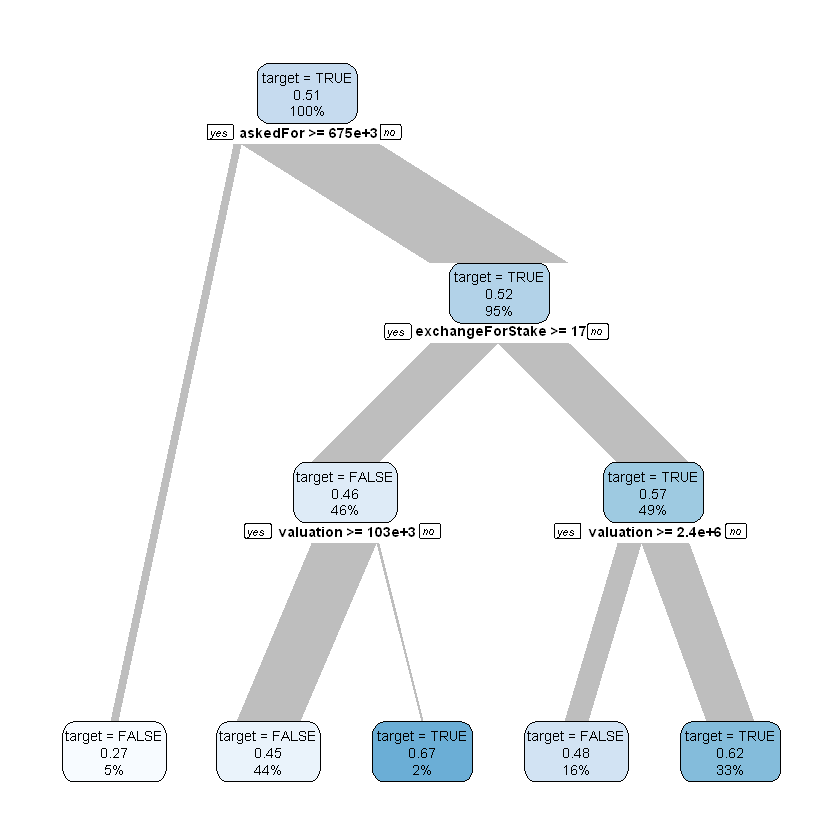

In [14]:
data %>% select(askedFor, exchangeForStake, valuation, deal) %>% explain_tree(target = deal)

In [15]:
#creating a copy of the dataset

dtmdata <- stcsparse

In [16]:
#splitting of data (80-20 ratio)

set.seed(1234)

train.index <- createDataPartition(stcsparse$deal, p = .8, list = FALSE)
train <- stcsparse[train.index,]
test  <- stcsparse[-train.index,]

In [17]:
#CART Model

library(rpart)
library(rpart.plot)

library(DataExplorer)
library(greybox)
library(rattle)

Warning message:
"package 'rpart' was built under R version 3.6.2"Warning message:
"package 'rpart.plot' was built under R version 3.6.2"Warning message:
"package 'DataExplorer' was built under R version 3.6.2"Warning message:
"package 'greybox' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 method overwritten by 'greybox':
  method     from
  print.pcor lava
Package "greybox", v0.6.0 loaded.

Attaching package: 'greybox'

The following object is masked from 'package:caret':

    MAE

Warning message:
"package 'rattle' was built under R version 3.6.3"Loading required package: tibble
Warning message:
"package 'tibble' was built under R version 3.6.3"Loading required package: bitops
Rattle: A free graphical interface for data science with R.
Version 5.4.0 Copyright (c) 2006-2020 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


png 
  2

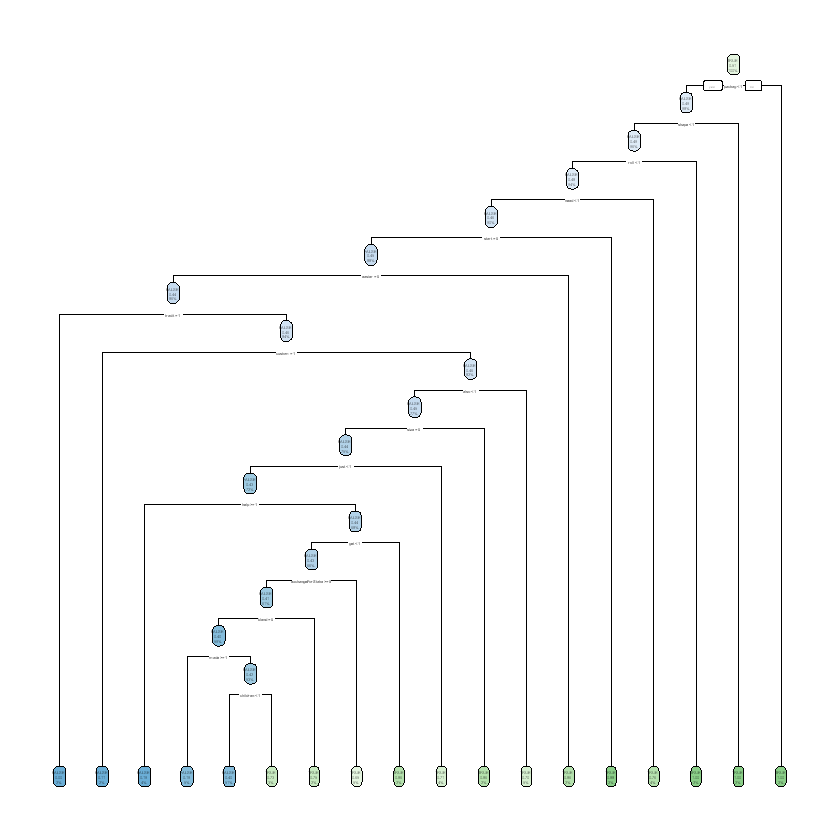

Call:
rpart(formula = deal ~ ., data = train, method = "class")
  n= 397 

          CP nsplit rel error    xerror       xstd
1 0.03443878      0 1.0000000 1.0969388 0.05065282
2 0.03061224      4 0.8622449 1.1530612 0.05033858
3 0.02551020      5 0.8316327 1.1224490 0.05052969
4 0.01360544      6 0.8061224 1.1224490 0.05052969
5 0.01275510     15 0.6326531 1.0408163 0.05080921
6 0.01000000     17 0.6071429 0.9897959 0.05081566

Variable importance
          packag             roll            shape           tradit 
               7                6                6                5 
            need            start              get             size 
               5                4                4                4 
            also           easier             just         children 
               4                4                4                3 
          custom exchangeForStake             made             help 
               3                3                3              

$names
 [1] "frame"               "where"               "call"               
 [4] "terms"               "cptable"             "method"             
 [7] "parms"               "control"             "functions"          
[10] "numresp"             "splits"              "variable.importance"
[13] "y"                   "ordered"            

$xlevels
named list()

$ylevels
[1] "FALSE" "TRUE" 

$class
[1] "rpart"

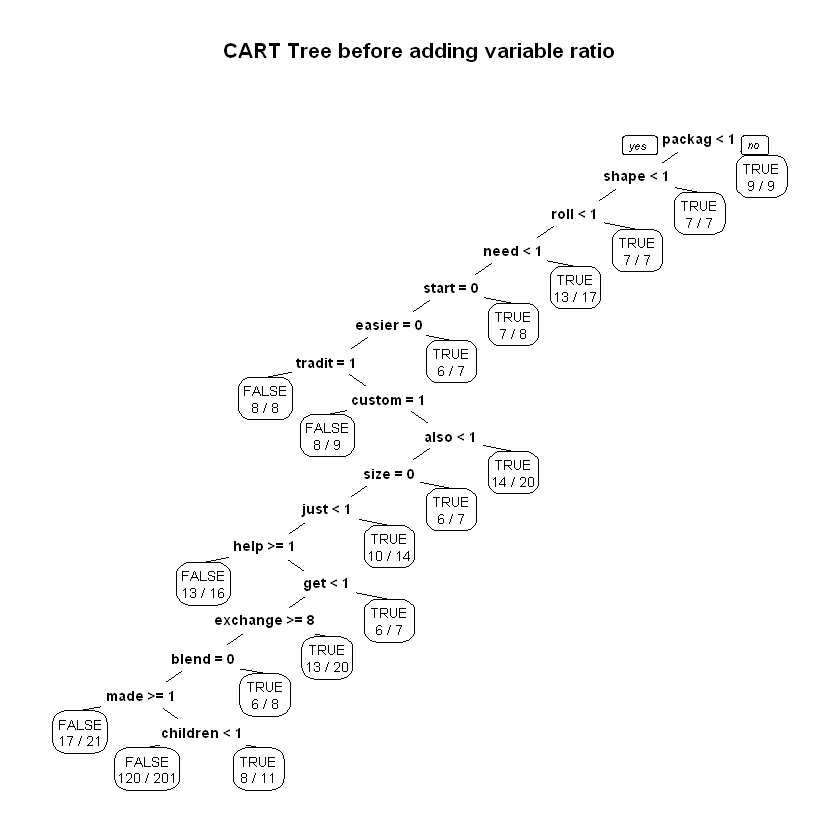

In [19]:
SharktankCart = rpart(deal ~ ., data=train, method="class")
rpart.plot(SharktankCart)

#printing the cart tree in a pdf document

pdf("Cart.pdf")
fancyRpartPlot(SharktankCart, palettes=c("Greys", "Oranges"), 
               main = "CART model before adding variable ratio")
dev.off()

#CART Diagram
prp(SharktankCart, extra=2, main = "CART Tree before adding variable ratio")

summary(SharktankCart)
attributes(SharktankCart)

In [20]:
#confusion matrix

train$predict.class <- predict(SharktankCart, train, type="class")
train$predict.score <- predict(SharktankCart, train)

confmattrain = table(train[,c("deal","predict.class")])
confusionMatrix(confmattrain)

Confusion Matrix and Statistics

       predict.class
deal    FALSE TRUE
  FALSE   166   30
  TRUE     89  112
                                          
               Accuracy : 0.7003          
                 95% CI : (0.6526, 0.7449)
    No Information Rate : 0.6423          
    P-Value [Acc > NIR] : 0.008615        
                                          
                  Kappa : 0.4026          
                                          
 Mcnemar's Test P-Value : 1.056e-07       
                                          
            Sensitivity : 0.6510          
            Specificity : 0.7887          
         Pos Pred Value : 0.8469          
         Neg Pred Value : 0.5572          
             Prevalence : 0.6423          
         Detection Rate : 0.4181          
   Detection Prevalence : 0.4937          
      Balanced Accuracy : 0.7199          
                                          
       'Positive' Class : FALSE           
                             

In [21]:
#predicting for the test dataset

test$predict.class <- predict(SharktankCart, test, type="class")
test$predict.score <- predict(SharktankCart, test)

confmattest = table(test[,c("deal","predict.class")])
confusionMatrix(confmattest)

Confusion Matrix and Statistics

       predict.class
deal    FALSE TRUE
  FALSE    32   16
  TRUE     29   21
                                         
               Accuracy : 0.5408         
                 95% CI : (0.4371, 0.642)
    No Information Rate : 0.6224         
    P-Value [Acc > NIR] : 0.96052        
                                         
                  Kappa : 0.0862         
                                         
 Mcnemar's Test P-Value : 0.07364        
                                         
            Sensitivity : 0.5246         
            Specificity : 0.5676         
         Pos Pred Value : 0.6667         
         Neg Pred Value : 0.4200         
             Prevalence : 0.6224         
         Detection Rate : 0.3265         
   Detection Prevalence : 0.4898         
      Balanced Accuracy : 0.5461         
                                         
       'Positive' Class : FALSE          
                                         

In [25]:
#Logistic Regression (80:20 split)

library(ROCR)
library(lmtest)
library(pscl)

Warning message:
"package 'ROCR' was built under R version 3.6.3"
Attaching package: 'ROCR'

The following object is masked from 'package:mlr':

    performance

Warning message:
"package 'lmtest' was built under R version 3.6.2"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.2"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Warning message:
"package 'pscl' was built under R version 3.6.3"Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis


In [26]:

set.seed(1234)
split <- createDataPartition(stcsparse$deal, p = .8, list = FALSE)
train_lt <- stcsparse[split,]
test_lt  <- stcsparse[-split,]

lg_model <- glm(deal ~ .,data = train_lt,family = binomial())

summary(lg_model)

pR2(lg_model)

Warning message:
"glm.fit: algorithm did not converge"


Call:
glm(formula = deal ~ ., family = binomial(), data = train_lt)

Deviance Residuals: 
  [1]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [26]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [51]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [76]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[101]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[126]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[151]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[176]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[201]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[226]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[251]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[276]  0  0  0  0 

fitting null model for pseudo-r2


llh       llhNull            G2      McFadden          r2ML 
-1.151591e-09 -2.751479e+02  5.502959e+02  1.000000e+00  7.499603e-01 
         r2CU 
 1.000000e+00

In [27]:
#Confusion matrix of train data

pred<-predict(lg_model,train_lt,type='response')
mat_tab<-table(train_lt$deal, pred > 0.5)
mat_tab

lt_acc <- sum(diag(mat_tab))/sum(mat_tab)
lt_acc*100

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

       
        FALSE TRUE
  FALSE   196    0
  TRUE      0  201

[1] 100

In [28]:
#Prediction and Confusion matrix of test data

tdata <- predict(lg_model,test_lt, type="response")
t_confmat <- table(test_lt$deal, tdata > 0.5)
t_confmat
test_acc <- sum(diag(t_confmat))/sum(t_confmat)
test_acc*100

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

       
        FALSE TRUE
  FALSE    26   22
  TRUE     24   26

[1] 53.06122

In [29]:
#Random Forest

#loading the required package for random forest

library(randomForest)

set.seed(1234)
split_rf <- createDataPartition(stcsparse$deal, p = .8, list = FALSE)
train_rf <- stcsparse[split_rf,]
test_rf  <- stcsparse[-split_rf,]

model_rf<-randomForest(deal~.,data=train_rf,importance=T)
model_rf

Warning message:
"package 'randomForest' was built under R version 3.6.2"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:rattle':

    importance

The following object is masked from 'package:ggplot2':

    margin

The following object is masked from 'package:dplyr':

    combine




Call:
 randomForest(formula = deal ~ ., data = train_rf, importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 30

        OOB estimate of  error rate: 42.82%
Confusion matrix:
      FALSE TRUE class.error
FALSE   133   63   0.3214286
TRUE    107   94   0.5323383

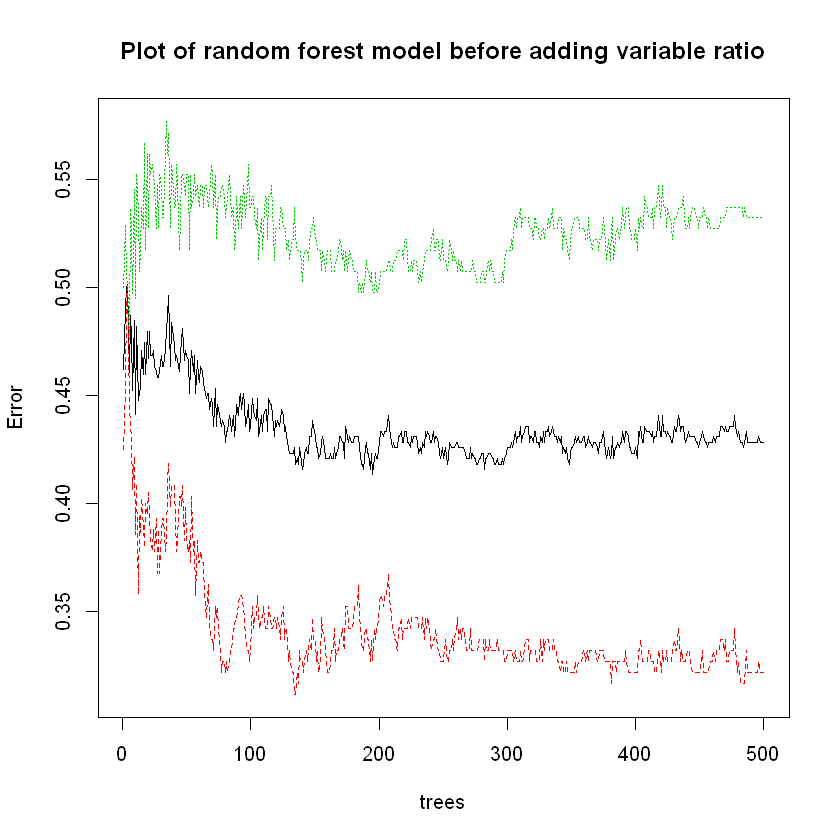

In [30]:
plot(model_rf, main = "Plot of random forest model before adding variable ratio")

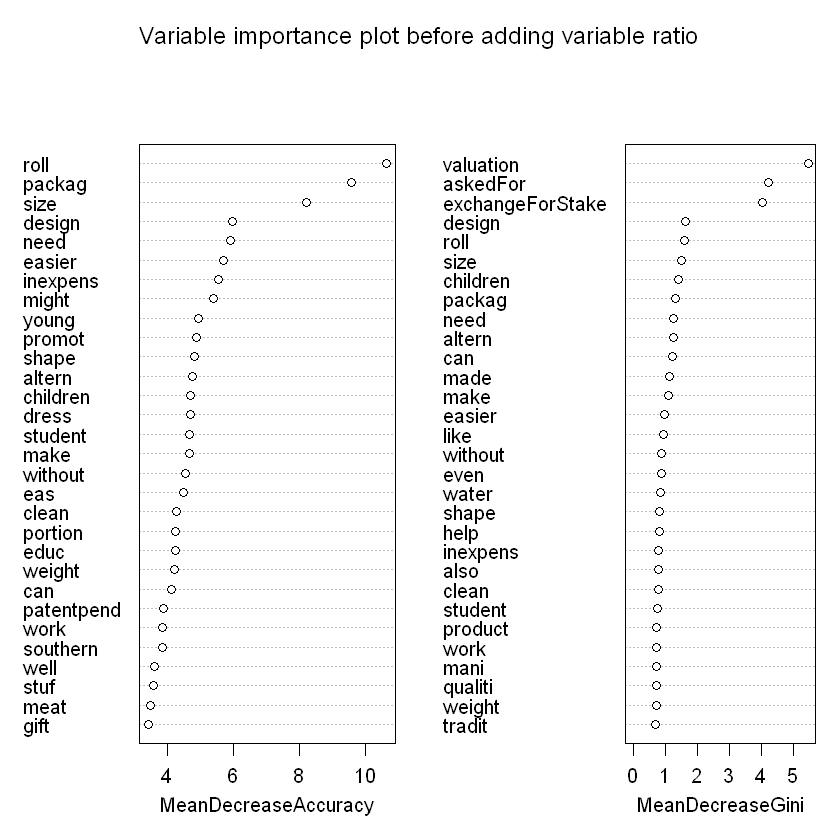

In [31]:
varImpPlot(model_rf, main = "Variable importance plot before adding variable ratio")

In [32]:
#confusion matrix

train_rf$predict.class <- predict(model_rf, train_rf, type="class")
train_rf$predict.score <- predict(model_rf, train_rf)

confmattrain_rf = table(train_rf[,c("deal","predict.class")])
confusionMatrix(confmattrain_rf)

Confusion Matrix and Statistics

       predict.class
deal    FALSE TRUE
  FALSE   196    0
  TRUE      0  201
                                     
               Accuracy : 1          
                 95% CI : (0.9908, 1)
    No Information Rate : 0.5063     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.4937     
         Detection Rate : 0.4937     
   Detection Prevalence : 0.4937     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : FALSE      
                                     

In [33]:
#predicting for the test dataset

test_rf$predict.class <- predict(model_rf, test_rf, type="class")
test_rf$predict.score <- predict(model_rf, test_rf)

confmattest_rf = table(test_rf[,c("deal","predict.class")])
confusionMatrix(confmattest_rf)

Confusion Matrix and Statistics

       predict.class
deal    FALSE TRUE
  FALSE    30   18
  TRUE     25   25
                                          
               Accuracy : 0.5612          
                 95% CI : (0.4573, 0.6613)
    No Information Rate : 0.5612          
    P-Value [Acc > NIR] : 0.5421          
                                          
                  Kappa : 0.1246          
                                          
 Mcnemar's Test P-Value : 0.3602          
                                          
            Sensitivity : 0.5455          
            Specificity : 0.5814          
         Pos Pred Value : 0.6250          
         Neg Pred Value : 0.5000          
             Prevalence : 0.5612          
         Detection Rate : 0.3061          
   Detection Prevalence : 0.4898          
      Balanced Accuracy : 0.5634          
                                          
       'Positive' Class : FALSE           
                             

In [34]:
#addition of new variable -- Ratio

dtmdata$ratio = dtmdata$askedFor/dtmdata$valuation

In [35]:
#modelling

set.seed(1234)

train.index_aft <- createDataPartition(dtmdata$deal, p = .8, list = FALSE)
train_aft <- stcsparse[train.index_aft,]
test_aft  <- stcsparse[-train.index_aft,]

png 
  2

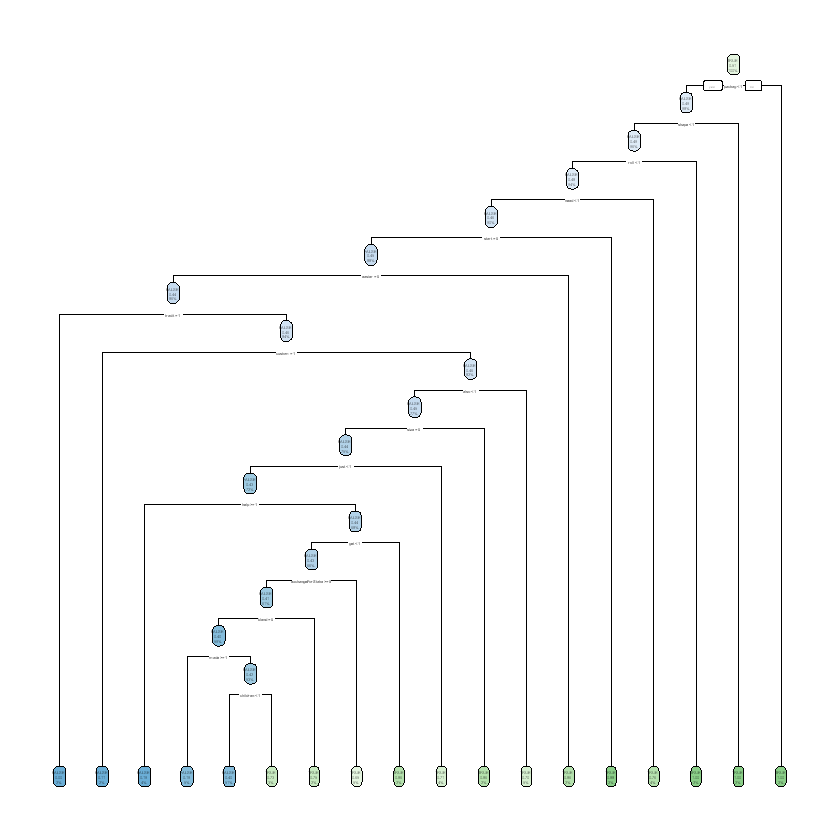

In [36]:
#CART model

SharktankCart_aft = rpart(deal ~ ., data=train_aft, method="class")
rpart.plot(SharktankCart_aft)

#printing the cart tree in a pdf document

pdf("Cart_after.pdf")
fancyRpartPlot(SharktankCart_aft, palettes=c("Greys", "Oranges"),
               main = "CART tree after adding variable ratio")
dev.off()

Call:
rpart(formula = deal ~ ., data = train_aft, method = "class")
  n= 397 

          CP nsplit rel error    xerror       xstd
1 0.03443878      0 1.0000000 1.0969388 0.05065282
2 0.03061224      4 0.8622449 1.1530612 0.05033858
3 0.02551020      5 0.8316327 1.1224490 0.05052969
4 0.01360544      6 0.8061224 1.1224490 0.05052969
5 0.01275510     15 0.6326531 1.0408163 0.05080921
6 0.01000000     17 0.6071429 0.9897959 0.05081566

Variable importance
          packag             roll            shape           tradit 
               7                6                6                5 
            need            start              get             size 
               5                4                4                4 
            also           easier             just         children 
               4                4                4                3 
          custom exchangeForStake             made             help 
               3                3                3          

$names
 [1] "frame"               "where"               "call"               
 [4] "terms"               "cptable"             "method"             
 [7] "parms"               "control"             "functions"          
[10] "numresp"             "splits"              "variable.importance"
[13] "y"                   "ordered"            

$xlevels
named list()

$ylevels
[1] "FALSE" "TRUE" 

$class
[1] "rpart"

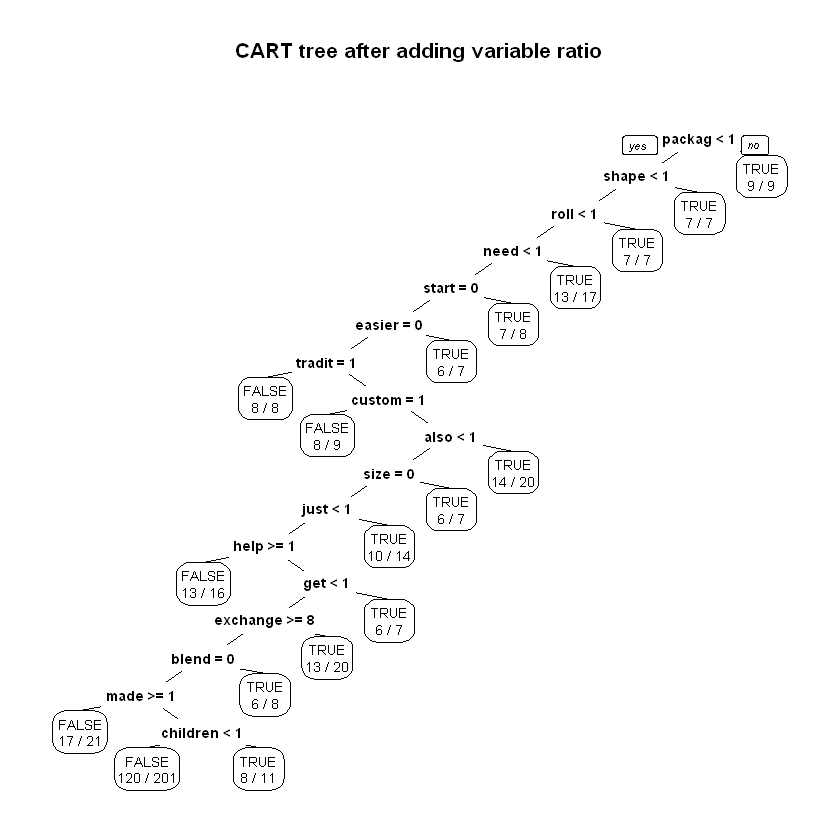

In [37]:
#CART Diagram
prp(SharktankCart_aft, extra=2, main = "CART tree after adding variable ratio")

summary(SharktankCart_aft)
attributes(SharktankCart_aft)

In [38]:
#confusion matrix

train_aft$predict.class <- predict(SharktankCart_aft, train_aft, type="class")
train_aft$predict.score <- predict(SharktankCart_aft, train_aft)

confmattrain_aft = table(train_aft[,c("deal","predict.class")])
confusionMatrix(confmattrain_aft)

Confusion Matrix and Statistics

       predict.class
deal    FALSE TRUE
  FALSE   166   30
  TRUE     89  112
                                          
               Accuracy : 0.7003          
                 95% CI : (0.6526, 0.7449)
    No Information Rate : 0.6423          
    P-Value [Acc > NIR] : 0.008615        
                                          
                  Kappa : 0.4026          
                                          
 Mcnemar's Test P-Value : 1.056e-07       
                                          
            Sensitivity : 0.6510          
            Specificity : 0.7887          
         Pos Pred Value : 0.8469          
         Neg Pred Value : 0.5572          
             Prevalence : 0.6423          
         Detection Rate : 0.4181          
   Detection Prevalence : 0.4937          
      Balanced Accuracy : 0.7199          
                                          
       'Positive' Class : FALSE           
                             

In [39]:
#predicting for the test dataset

test_aft$predict.class <- predict(SharktankCart_aft, test_aft, type="class")
test_aft$predict.score <- predict(SharktankCart_aft, test_aft)

confmattest_aft = table(test_aft[,c("deal","predict.class")])
confusionMatrix(confmattest_aft)

Confusion Matrix and Statistics

       predict.class
deal    FALSE TRUE
  FALSE    32   16
  TRUE     29   21
                                         
               Accuracy : 0.5408         
                 95% CI : (0.4371, 0.642)
    No Information Rate : 0.6224         
    P-Value [Acc > NIR] : 0.96052        
                                         
                  Kappa : 0.0862         
                                         
 Mcnemar's Test P-Value : 0.07364        
                                         
            Sensitivity : 0.5246         
            Specificity : 0.5676         
         Pos Pred Value : 0.6667         
         Neg Pred Value : 0.4200         
             Prevalence : 0.6224         
         Detection Rate : 0.3265         
   Detection Prevalence : 0.4898         
      Balanced Accuracy : 0.5461         
                                         
       'Positive' Class : FALSE          
                                         

In [40]:
#Logistic Regression (80:20 split)

set.seed(1234)
split_af <- createDataPartition(dtmdata$deal, p = .8, list = FALSE)
train_lt.af <- stcsparse[split_af,]
test_lt.af  <- stcsparse[-split_af,]

lg_model.aft <- glm(deal ~ .,data = train_lt.af,family = binomial())

summary(lg_model.aft)

pR2(lg_model.aft)

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = deal ~ ., family = binomial(), data = train_lt.af)

Deviance Residuals: 
  [1]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [26]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [51]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [76]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[101]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[126]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[151]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[176]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[201]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[226]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[251]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[276]  0  0  0 

fitting null model for pseudo-r2


llh       llhNull            G2      McFadden          r2ML 
-3.063711e+03 -2.751479e+02 -5.577125e+03 -1.013478e+01 -1.261956e+06 
         r2CU 
-1.682697e+06

In [41]:
#Confusion matrix of train data

pred_aft<-predict(lg_model.aft,train_lt.af,type='response')
mat_tab.af<-table(train_lt.af$deal, pred_aft > 0.5)
mat_tab.af

lt_acc_aft <- sum(diag(mat_tab.af))/sum(mat_tab.af)
lt_acc_aft*100

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

       
        FALSE TRUE
  FALSE   162   34
  TRUE     51  150

[1] 78.58942

In [42]:
#Prediction and Confusion matrix of test data

tdata_aft <- predict(lg_model.aft,test_lt.af, type="response")
t_confmat.aft <- table(test_lt.af$deal, tdata_aft > 0.5)
t_confmat.aft

test_acc.aft <- sum(diag(t_confmat.aft))/sum(t_confmat.aft)
test_acc.aft*100

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

       
        FALSE TRUE
  FALSE    25   23
  TRUE     22   28

[1] 54.08163

In [43]:
#Random Forest

set.seed(1234)
split_rf.aft <- createDataPartition(dtmdata$deal, p = .8, list = FALSE)
train_rf.aft <- stcsparse[split_rf.aft,]
test_rf.aft  <- stcsparse[-split_rf.aft,]

model_rf.aft<-randomForest(deal~.,data=train_rf.aft,importance=T)
model_rf.aft


Call:
 randomForest(formula = deal ~ ., data = train_rf.aft, importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 30

        OOB estimate of  error rate: 42.82%
Confusion matrix:
      FALSE TRUE class.error
FALSE   133   63   0.3214286
TRUE    107   94   0.5323383

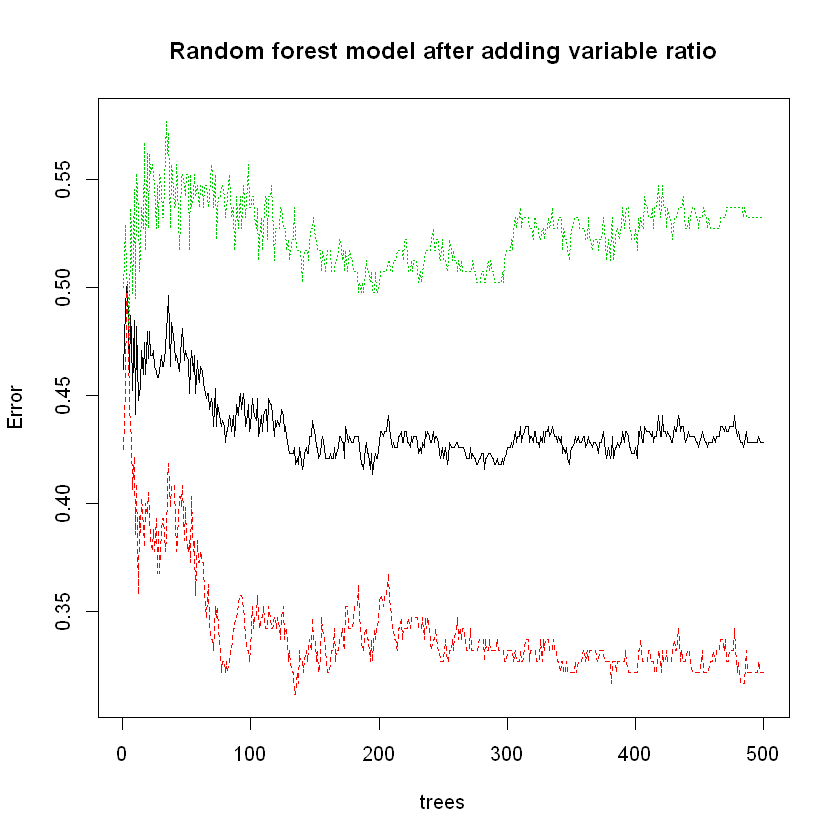

In [44]:
plot(model_rf.aft, main = "Random forest model after adding variable ratio")

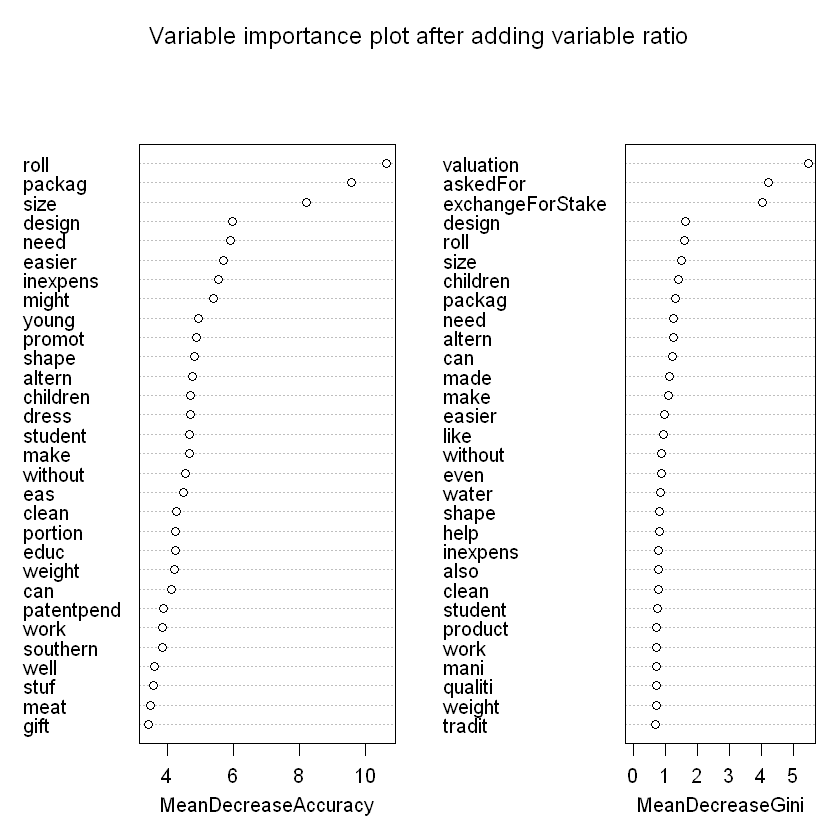

In [45]:
varImpPlot(model_rf.aft, main = "Variable importance plot after adding variable ratio")

In [46]:
#confusion matrix

train_rf.aft$predict.class <- predict(model_rf.aft, train_rf.aft, type="class")
train_rf.aft$predict.score <- predict(model_rf.aft, train_rf.aft)

confmattrain_rf.aft = table(train_rf.aft[,c("deal","predict.class")])
confusionMatrix(confmattrain_rf.aft)

Confusion Matrix and Statistics

       predict.class
deal    FALSE TRUE
  FALSE   196    0
  TRUE      0  201
                                     
               Accuracy : 1          
                 95% CI : (0.9908, 1)
    No Information Rate : 0.5063     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.4937     
         Detection Rate : 0.4937     
   Detection Prevalence : 0.4937     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : FALSE      
                                     

In [47]:
#predicting for the test dataset

test_rf.aft$predict.class <- predict(model_rf.aft, test_rf.aft, type="class")
test_rf.aft$predict.score <- predict(model_rf.aft, test_rf.aft)

confmattest_rf.aft = table(test_rf.aft[,c("deal","predict.class")])
confusionMatrix(confmattest_rf.aft)

Confusion Matrix and Statistics

       predict.class
deal    FALSE TRUE
  FALSE    30   18
  TRUE     25   25
                                          
               Accuracy : 0.5612          
                 95% CI : (0.4573, 0.6613)
    No Information Rate : 0.5612          
    P-Value [Acc > NIR] : 0.5421          
                                          
                  Kappa : 0.1246          
                                          
 Mcnemar's Test P-Value : 0.3602          
                                          
            Sensitivity : 0.5455          
            Specificity : 0.5814          
         Pos Pred Value : 0.6250          
         Neg Pred Value : 0.5000          
             Prevalence : 0.5612          
         Detection Rate : 0.3061          
   Detection Prevalence : 0.4898          
      Balanced Accuracy : 0.5634          
                                          
       'Positive' Class : FALSE           
                             